#1118004 - 01 - APRENDIZADO DE MÁQUINA - Implementação do ID3

##Professor: Ulisses Brisolara Corrêa

##Autor: Guilherme Lima

In [ ]:
import pandas as pd
import numpy as np

import math

from matplotlib import pyplot as plt
import seaborn as sns

import random
from pprint import pprint

from collections import Counter
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [ ]:
%matplotlib inline

In [ ]:
import csv

In [ ]:
class Node:
    def __init__(self, feature=None, value=None, results=None, true_branch=None, false_branch=None):
        self.feature = feature
        self.value = value
        self.results = results
        self.true_branch = true_branch
        self.false_branch = false_branch

In [ ]:
def entropy(data):
    counts = np.bincount(data)
    probabilities = counts / len(data)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

In [ ]:
def split_data(X, y, feature, value):
    true_indices = np.where(X[:, feature] <= value)[0]
    false_indices = np.where(X[:, feature] > value)[0]
    true_X, true_y = X[true_indices], y[true_indices]
    false_X, false_y = X[false_indices], y[false_indices]
    return true_X, true_y, false_X, false_y

In [ ]:
def build_tree(X, y):
    if len(set(y)) == 1:
        return Node(results=y[0])

    best_gain = 0
    best_criteria = None
    best_sets = None
    n_features = X.shape[1]

    current_entropy = entropy(y)

    for feature in range(n_features):
        feature_values = set(X[:, feature])
        for value in feature_values:
            true_X, true_y, false_X, false_y = split_data(X, y, feature, value)
            true_entropy = entropy(true_y)
            false_entropy = entropy(false_y)
            p = len(true_y) / len(y)
            gain = current_entropy - p * true_entropy - (1 - p) * false_entropy

            if gain > best_gain:
                best_gain = gain
                best_criteria = (feature, value)
                best_sets = (true_X, true_y, false_X, false_y)

    if best_gain > 0:
        true_branch = build_tree(best_sets[0], best_sets[1])
        false_branch = build_tree(best_sets[2], best_sets[3])
        return Node(feature=best_criteria[0], value=best_criteria[1], true_branch=true_branch, false_branch=false_branch)

    return Node(results=y[0])

In [ ]:
def predict(tree, sample):
    if tree.results is not None:
        return tree.results
    else:
        branch = tree.false_branch
        feature_value = sample[tree.feature[0]] if isinstance(tree.feature, (list, np.ndarray)) else sample[tree.feature]
        if (feature_value <= tree.value).any():
            branch = tree.true_branch
        return predict(branch, sample)

In [ ]:
def importDataSet(file_path, delimiter, test_size):
    df = pd.read_csv(file_path, delimiter=delimiter)

    if 'Number of Doctors Visited' not in df.columns:
        print("Erro: 'Number of Doctors Visited' não encontrado nas colunas")
        print("Colunas disponíveis:", df.columns)
        return None, None
    train_df, test_df = train_test_split(df, test_size=test_size)
    return train_df, test_df

In [ ]:
predction_three = []
def main():
    train_df, test_df = importDataSet('NPHA-doctor-visits.csv', ',', 0.2)

    if train_df is None and test_df is None:
        print("Erro ao carregar o dataset.")
        return

    if 'Number of Doctors Visited' not in train_df.columns:
        print("Coluna 'Number of Doctors Visited' não encontrada.")
        return

    X_train = train_df.drop('Number of Doctors Visited', axis=1)
    y_train = train_df['Number of Doctors Visited'].values
    X_test = test_df.drop('Number of Doctors Visited', axis=1)
    y_test = test_df['Number of Doctors Visited'].values
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    decision_tree = build_tree(X_train, y_train)
    for x in X_test:
        predction_three.append(predict(decision_tree, x))

    f1 = f1_score(y_test, predction_three, average='macro')
    print(f'F1-Score: {f1:.2f}')

In [ ]:
main()

F1-Score: 0.31


In [ ]:
df = pd.read_csv('NPHA-doctor-visits.csv', delimiter=',')

In [ ]:
df.groupby('Number of Doctors Visited').size()

,0
Number of Doctors Visited,
1,131
2,372
3,211


<ipython-input-133-045cbfb05573>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts, palette='Purples')


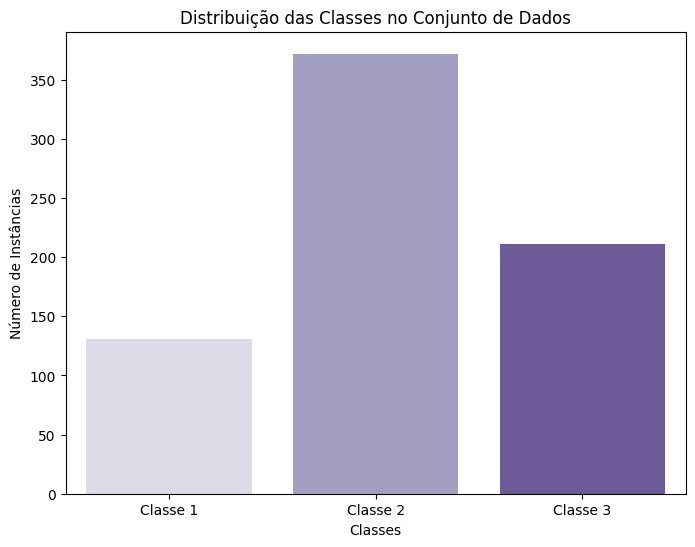

In [ ]:
class_counts = np.array([131, 372, 211])
class_labels = ['Classe 1', 'Classe 2', 'Classe 3']

plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_counts, palette='Purples')
plt.title('Distribuição das Classes no Conjunto de Dados')
plt.ylabel('Número de Instâncias')
plt.xlabel('Classes')
plt.show()